In [10]:
import cv2
import matplotlib.pyplot as plt

classLables = [] #all labels in text file will be stored here

config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file) #is typically used to load a pre-trained 
                                                         #detection model for various tasks such as object detection

lable_file = 'labels.txt'
with open(lable_file,'rt') as lbl:
    classLables=lbl.read().rstrip('\n').split('\n')
    
model.setInputSize(320,320)               # Set value for frame
model.setInputScale(1.0/127.5)            # Normalize input values
model.setInputMean((127.5,127.5,127.5))   # Mean subtraction for input data
model.setInputSwapRB(True)                # Swap Red and Blue channels in input images

< cv2.dnn.Model 000001BB3D174850>

In [11]:
def image(path):
    img = cv2.imread(path)
    classIndex, confidence, bbox = model.detect(img, confThreshold=0.5)
    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN
    for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
        cv2.rectangle(img,boxes,(255,0,0),2)
        cv2.putText(img, classLables[ClassInd-1],(boxes[0]+10, boxes[1]+40), font, fontScale = font_scale,color=(0,255,0),thickness=3)
                    #     What to be written        coordinate of text                                           B  G  R
        
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
def video(path):
    cap = cv2.VideoCapture(path)

    if not cap.isOpened():                                  #This line checks whether the video capture object cap is not open
        cap = cv2.VideoCapture(0)                           #code is trying to initialize video capture from the default camera

    if not cap.isOpened():                                  #It means that the camera couldn't be accessed or there was an 
        raise IOError('Cannot open this video')             #issue with opening it. Therfore error is raised

    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN

    while True:
        ret, frame = cap.read()
        classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

        if len(classIndex) != 0:      # Will check if any object was detected or not 
            for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
                if ClassInd <= 80:
                    cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                    cv2.putText(frame, classLables[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

        cv2.imshow('Object Detection', frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [13]:
def camera():
    cap = cv2.VideoCapture(0)
    adrress ='https://172.20.121.205:8080/video'
    cap.open(adrress)

    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN

    while True:
        ret, frame = cap.read()
        classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

        if len(classIndex) != 0:
            for ClassInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
                if ClassInd <= 80:
                    cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                    cv2.putText(frame, classLables[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

        cv2.imshow('Detection', frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [14]:
video('traffic1.mp4')

In [8]:
camera()

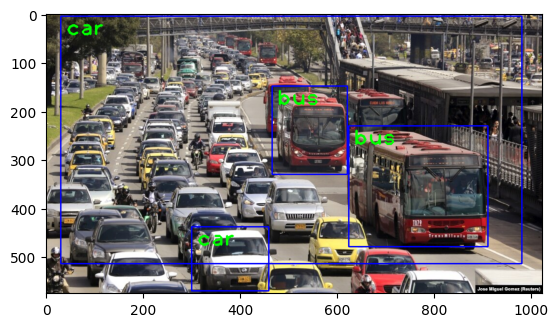

In [15]:
image('traffic.jpg')

In [16]:
print(classLables)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
